In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, f1_score
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
import pandas as pd
import os
train = pd.read_csv(os.path.join(os.getcwd().replace('model', ''), 'data/processed_train.csv') )
test = pd.read_csv(os.path.join(os.getcwd().replace('model', ''), 'data/processed_test.csv') )
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27390 entries, 0 to 27389
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       27390 non-null  object
 1   sentiment  27390 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 428.1+ KB


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
def model_eval(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f'Accuracy Score is : {accuracy_score(y_test,y_pred)}')
    print(f'Classification_report')
    print(classification_report(y_test,y_pred))
    print(f'Confusion Matrix')
    cm=confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

In [4]:
def model_train(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    return f1_score(y_test, y_pred, average="weighted")

In [5]:
def tfidf_vectorizer():
    vec=TfidfVectorizer(max_features=10000)
    x_train=vec.fit_transform(train['text']).toarray()
    x_test=vec.transform(test['text']).toarray()
    y_train=train['sentiment']
    y_test=test['sentiment']
    return x_train, y_train, x_test, y_test

def bog_vectorizer():
    vec = CountVectorizer(max_features=10000)
    x_train = vec.fit_transform(train['text']).toarray()
    x_test = vec.transform(test['text']).toarray()
    y_train = train['sentiment']
    y_test = test['sentiment']
    return x_train, y_train, x_test, y_test

def binary_vectorizer():
    vec = CountVectorizer(binary=True, max_features=10000)
    x_train = vec.fit_transform(train['text']).toarray()
    x_test = vec.transform(test['text']).toarray()
    y_train = train['sentiment']
    y_test = test['sentiment']
    return x_train, y_train, x_test, y_test

In [ ]:
best_f1 = 0
ns =[50,100,150,200]
criterions = ['gini', 'entropy']
max_depths = [None, 5, 10, 15]
min_samples_splits = [2, 5, 10]
min_samples_leafs = [1, 2, 4]
for n in ns:
    for criterion in criterions:
        for max_depth in max_depths:
            for min_samples_split in min_samples_splits:
                for min_samples_leaf in min_samples_leafs:
                    # TF-IDF Vectorization
                    x_train, y_train, x_test, y_test = tfidf_vectorizer()
                    rf = RandomForestClassifier(n_estimators=n, criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
                    f1 = model_train(rf)
                    if f1 > best_f1:
                        best_f1 = f1
                        best_n = n
                        best_criterion = criterion
                        best_max_depth = max_depth
                        best_min_samples_split = min_samples_split
                        best_min_samples_leaf = min_samples_leaf
                        best_vectorization = 'TF-IDF'
                    print(f"f1 score is {f1} with n = {n}, criterion = {criterion}, max_depth = {max_depth}, min_sample_split= {min_samples_split},min_sample_leaf = {min_samples_leaf}, vectorization=TF-IDF")
                    # Bag of Words Vectorization    
                    x_train, y_train, x_test, y_test = bog_vectorizer()
                    rf = RandomForestClassifier(n_estimators=n, criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
                    f1 = model_train(rf)
                    if f1 > best_f1:
                        best_f1 = f1
                        best_n = n
                        best_criterion = criterion
                        best_max_depth = max_depth
                        best_min_samples_split = min_samples_split
                        best_min_samples_leaf = min_samples_leaf
                        best_vectorization = 'Bag of Words'
                    print(f"f1 score is {f1} with n = {n}, criterion = {criterion}, max_depth = {max_depth}, min_sample_split= {min_samples_split},min_sample_leaf = {min_samples_leaf}, vectorization=Bag of Words")
                    # Binary Vectorization
                    x_train, y_train, x_test, y_test = binary_vectorizer()
                    rf = RandomForestClassifier(n_estimators=n, criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
                    f1 = model_train(rf)
                    if f1 > best_f1:
                        best_f1 = f1
                        best_n = n
                        best_criterion = criterion
                        best_max_depth = max_depth
                        best_min_samples_split = min_samples_split
                        best_min_samples_leaf = min_samples_leaf
                        best_vectorization = 'Binary'
                    print(f"f1 score is {f1} with n = {n}, criterion = {criterion}, max_depth = {max_depth}, min_sample_split= {min_samples_split},min_sample_leaf = {min_samples_leaf}, vectorization=Binary")
print(f"Best f1 score is {best_f1} with n = {best_n}, criterion = {best_criterion}, max_depth = {best_max_depth}, min_sample_split= {best_min_samples_split},min_sample_leaf = {best_min_samples_leaf}, vectorization={best_vectorization}")

KeyboardInterrupt: 

Accuracy Score is : 0.7236580516898609
Classification_report
              precision    recall  f1-score   support

           0       0.75      0.67      0.71      1000
           1       0.69      0.72      0.70      1418
           2       0.75      0.78      0.77      1103

    accuracy                           0.72      3521
   macro avg       0.73      0.72      0.73      3521
weighted avg       0.73      0.72      0.72      3521

Confusion Matrix


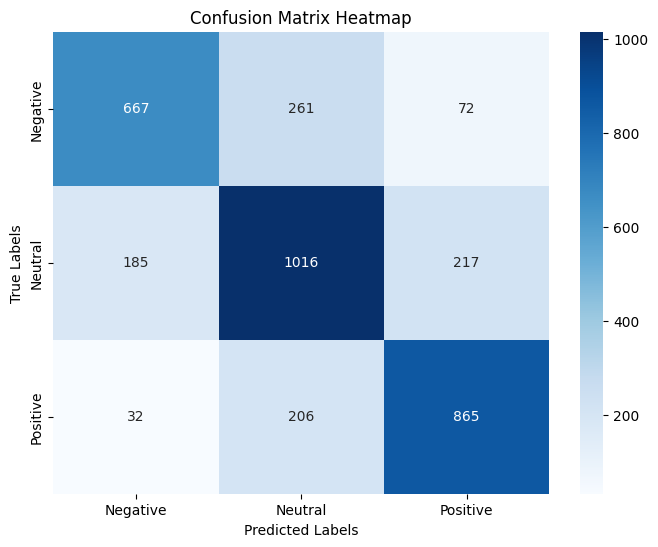

In [6]:
best_model = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=2)
x_train, y_train, x_test, y_test = bog_vectorizer()
model_eval(best_model)